# Data Preprocessing

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, train_test_split

from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

In [20]:
path1 = os.getcwd()
bc_data = path1 + '/' + 'bc_data.csv'

In [21]:
bc_data = pd.read_csv(bc_data)

In [22]:
bc_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [23]:
bc_data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [24]:
# Splitting data into testing and training set - 30% for testing

X_train, X_test, Y_train, Y_test = train_test_split(bc_data.iloc[:,:-1], bc_data['diagnosis'], test_size = 0.3 )

In [25]:
Y_train

310    0
67     0
324    0
492    1
359    0
      ..
240    0
400    1
558    0
228    0
354    0
Name: diagnosis, Length: 398, dtype: int64

In [26]:
len(Y_test)/(len(Y_train) + len(Y_test))*100

30.052724077328648

In [27]:
# Apply standard scaling to ensure no feature dominates (over others)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Question: why standard scaling needs to be applied fro X_train and X_test (but not Y)

In [28]:
X_train.shape

(398, 30)

# Modeling

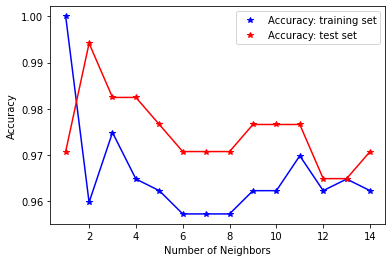

In [29]:
#KNN classifier
train_accuracy = []
test_accuracy = []

#try KNN for different k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_n in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_n)
    knn.fit(X_train,Y_train)
    train_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))

plt.plot(neighbors_setting,train_accuracy,'b*', label='Accuracy: training set')
plt.plot(neighbors_setting,train_accuracy,'b')

plt.plot(neighbors_setting,test_accuracy,'r*',label='Accuracy: test set')
plt.plot(neighbors_setting,test_accuracy,'r')


plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [30]:
print("Accuracy of the training set for 5NN: {:.3f}".format(train_accuracy[4]))
print("Accuracy of the test set for 5NN: {:.3f}".format(test_accuracy[4]))

Accuracy of the training set for 5NN: 0.962
Accuracy of the test set for 5NN: 0.977


Accuracy on the training set: 0.985
Accuracy on the test set: 0.982
[[112   3]
 [  0  56]]


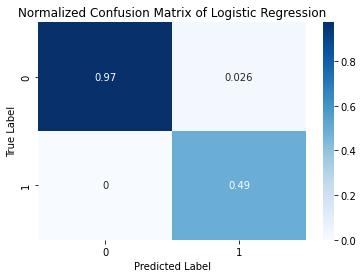

In [31]:
#Logistic Regression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, Y_train)

print('Accuracy on the training set: {:.3f}'.format(logistic_reg.score(X_train,Y_train)))
print('Accuracy on the test set: {:.3f}'.format(logistic_reg.score(X_test,Y_test)))


# feeding the training data into the model
logistic_reg.fit(X_train, Y_train)

# predicting the test set results
Y_pred = logistic_reg.predict(X_test)

# confusion matrix 
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

sum_mat1 = np.sum(cm, axis=1)
cm1 = cm/sum_mat1[0]
sns.heatmap(cm1, annot=True, cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix of Logistic Regression")
plt.show()

# In the confusion matrix, 1 represents malignant and 0 represents benign. 
# so, the confusion matrix is  [[True negative, False Positive]
#                                [False negative, True Positive]]

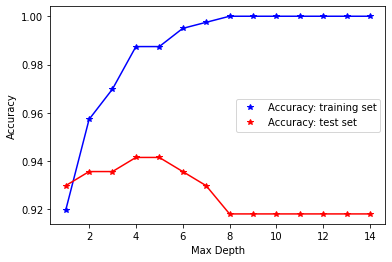

In [32]:
#Decision Tree
train_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for m1 in max_dep:
    tree = DecisionTreeClassifier(max_depth=m1,random_state=0)
    tree.fit(X_train,Y_train)
    train_accuracy.append(tree.score(X_train, Y_train))
    test_accuracy.append(tree.score(X_test, Y_test))

plt.plot(max_dep,train_accuracy,'b*', label='Accuracy: training set')
plt.plot(neighbors_setting,train_accuracy,'b')

plt.plot(neighbors_setting,test_accuracy,'r*',label='Accuracy: test set')
plt.plot(neighbors_setting,test_accuracy,'r')

plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

By having larger max_depth (> 5), the model is overfit into training data. The accuracy for the training set increased but the accuracy for the test set decreased.

Other parameters which could be included:
   - min_samples_leaf, max_sample_leaf
   - max_leaf_node
   
The accuracy is highest for both the set when maximum depth is 5.

In [15]:
print("Accuracy of the training set for Decision Tree: {:.3f}".format(train_accuracy[4]))
print("Accuracy of the test set for Decision Tree: {:.3f}".format(test_accuracy[4]))

Accuracy of the training set for Decision Tree: 0.995
Accuracy of the test set for Decision Tree: 0.918


[[102  11]
 [  4  54]]


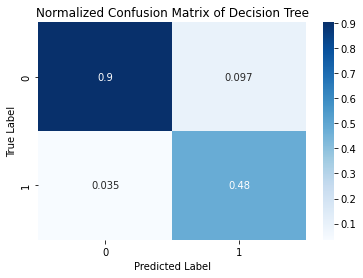

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       106
           1       0.93      0.83      0.88        65

    accuracy                           0.91       171
   macro avg       0.92      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171



In [17]:
# feedingthe training data into the model
tree.fit(X_train, Y_train)

# predicting the test set results
Y_pred = tree.predict(X_test)

# confusion matrix 
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

sum_mat1 = np.sum(cm, axis=1)
cm1 = cm/sum_mat1[0]
sns.heatmap(cm1, annot=True, cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix of Decision Tree")
plt.show()

print(classification_report(Y_pred, Y_test))


Training accuracy : 0.9899497487437185
Testing accuarcy : 0.9766081871345029
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       113
           1       0.97      0.97      0.97        58

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

[[111   2]
 [  2  56]]


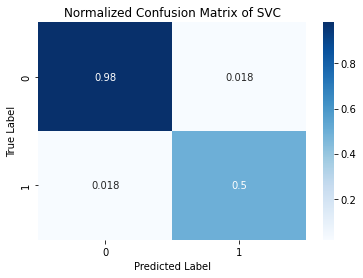

In [18]:
# Support Vector Machine

# creating a model
model = SVC()

# feedingthe training data into the model
model.fit(X_train, Y_train)

# predicting the test set results
Y_pred = model.predict(X_test)

# Calculating the accuracies
print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuarcy :", model.score(X_test, Y_test))

# classification report
cr = classification_report(Y_test, Y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

sum_mat1 = np.sum(cm, axis=1)
cm1 = cm/sum_mat1[0]
sns.heatmap(cm1, annot=True, cmap="Blues")

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix of SVC")
plt.show()


In [41]:
len(tree.feature_importances_)

30